# <font color='#FFE15D'>**Week 13: Neural Networks 🧠**</font>

## **🔸 Imports**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

## **🔸 Load Dataset**

(1000, 2) (1000,)


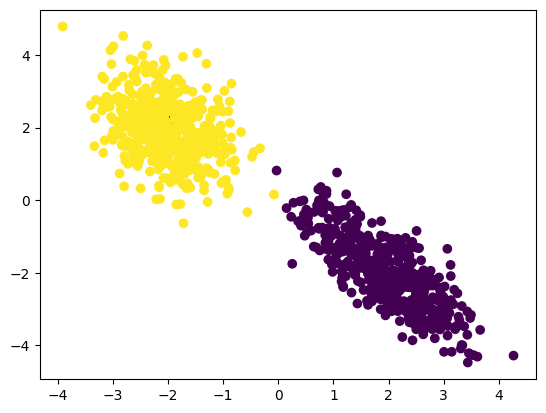

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, 
                           n_classes=2, random_state=27)
print(X.shape, y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Train-Test Split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

## **🔸 OOP Style**

In [4]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

1.0

In [5]:
model.intercept_, model.coef_

(array([-0.27505247]), array([[-3.06552241,  0.32327069]]))

### OOP Style

In [ ]:
class ModelName:
    
    def __init__(self, penalty, ...):
        pass
    
    def fit(self, x, y):
        pass
        
    def predict(self, x):
        pass
    
    def score(self, x, y):
        pass

## **🔸 Neuron (from Scratch)**

### Activation Function

In [12]:
def relu(x):
    return np.maximum(0, x)

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
def tanh(x):
    pass

### Loss 

In [15]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [16]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [17]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### Neuron

In [70]:
class Neuron:
    
    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose
    
    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat
    
    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss:.4}')
    
    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()
        
    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad
        
    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'
    
    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [75]:
neuron = Neuron(in_features=2, af=sigmoid)
neuron.predict(X)
print(neuron)
print(neuron.parameters())

Neuron(2, sigmoid)
{'w': array([[ 0.29178832],
       [-0.0512595 ]]), 'b': 0.7437694504369816}


In [76]:
neuron.fit(x_train, y_train[:, None])
neuron.parameters()

Iter=0, Loss=0.4362
Iter=10, Loss=0.0495
Iter=20, Loss=0.0275
Iter=30, Loss=0.02084
Iter=40, Loss=0.01755
Iter=50, Loss=0.01556
Iter=60, Loss=0.01419
Iter=70, Loss=0.01319
Iter=80, Loss=0.01241
Iter=90, Loss=0.01179


{'w': array([[-1.08297203],
        [ 1.1343178 ]]),
 'b': 0.3470325425088299}

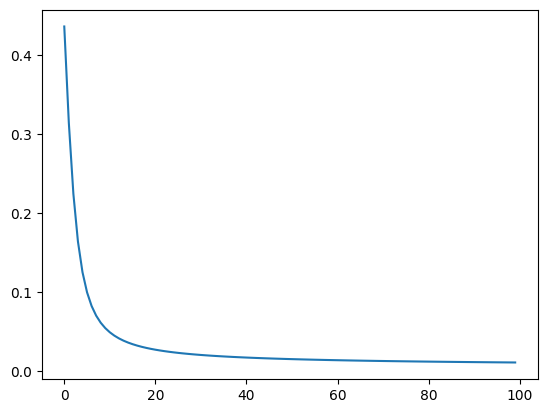

In [77]:
plt.plot(neuron.loss_hist)

### Train

In [82]:
neuron = Neuron(2, af=sigmoid, loss_fn=bce, n_iter=500)
neuron.fit(X, y[:, None])

Iter=0, Loss=0.1246
Iter=10, Loss=0.1046
Iter=20, Loss=0.09236
Iter=30, Loss=0.0841
Iter=40, Loss=0.07812
Iter=50, Loss=0.07358
Iter=60, Loss=0.06999
Iter=70, Loss=0.0671
Iter=80, Loss=0.0647
Iter=90, Loss=0.06268
Iter=100, Loss=0.06095
Iter=110, Loss=0.05946
Iter=120, Loss=0.05815
Iter=130, Loss=0.057
Iter=140, Loss=0.05597
Iter=150, Loss=0.05505
Iter=160, Loss=0.05422
Iter=170, Loss=0.05347
Iter=180, Loss=0.05279
Iter=190, Loss=0.05216
Iter=200, Loss=0.05159
Iter=210, Loss=0.05106
Iter=220, Loss=0.05057
Iter=230, Loss=0.05011
Iter=240, Loss=0.04969
Iter=250, Loss=0.04929
Iter=260, Loss=0.04892
Iter=270, Loss=0.04857
Iter=280, Loss=0.04824
Iter=290, Loss=0.04793
Iter=300, Loss=0.04764
Iter=310, Loss=0.04737
Iter=320, Loss=0.04711
Iter=330, Loss=0.04686
Iter=340, Loss=0.04662
Iter=350, Loss=0.0464
Iter=360, Loss=0.04618
Iter=370, Loss=0.04598
Iter=380, Loss=0.04578
Iter=390, Loss=0.0456
Iter=400, Loss=0.04542
Iter=410, Loss=0.04525
Iter=420, Loss=0.04508
Iter=430, Loss=0.04492
Iter=440

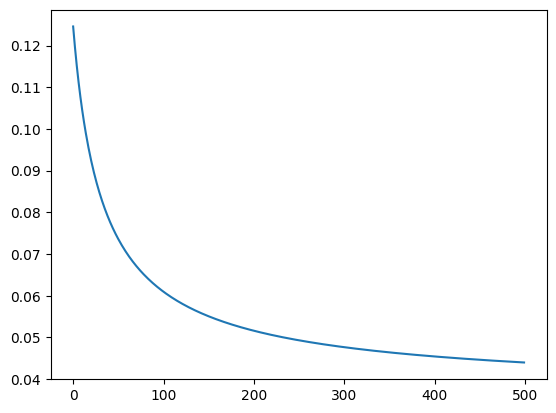

In [83]:
plt.plot(neuron.loss_hist)

### Evaluation

In [84]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

In [85]:
y_hat[:, 0], y_test

(array([7.63763959e-03, 9.99826810e-01, 2.36177640e-06, 9.74818094e-01,
        3.85976971e-03, 6.02038032e-05, 2.60070029e-05, 9.91744690e-01,
        9.59263068e-01, 5.16361390e-04, 9.92327738e-01, 9.99964855e-01,
        9.99714479e-01, 9.93008139e-01, 9.84115996e-01, 9.99477560e-01,
        6.50648466e-03, 9.94067655e-01, 1.21473659e-05, 9.99717865e-01,
        2.17783317e-04, 1.30436365e-05, 7.74469696e-01, 9.96998745e-01,
        2.51148419e-02, 9.99617212e-01, 9.88831945e-01, 2.85163969e-04,
        9.97466388e-01, 3.21454066e-05, 1.29513907e-05, 2.99432074e-01,
        9.98026081e-01, 9.91567824e-01, 2.05525075e-05, 4.18275030e-03,
        9.96958179e-01, 2.55382646e-04, 1.85003445e-03, 9.88837049e-01,
        1.41880628e-05, 8.43449642e-01, 2.22418126e-03, 1.93212675e-03,
        3.23216248e-03, 9.98093668e-01, 9.99393253e-01, 5.01135052e-02,
        9.87622032e-01, 9.99969479e-01, 9.87584746e-01, 1.67977586e-03,
        9.99453619e-01, 1.29682830e-02, 4.78006422e-03, 9.882791

### Plot

<AxesSubplot: >

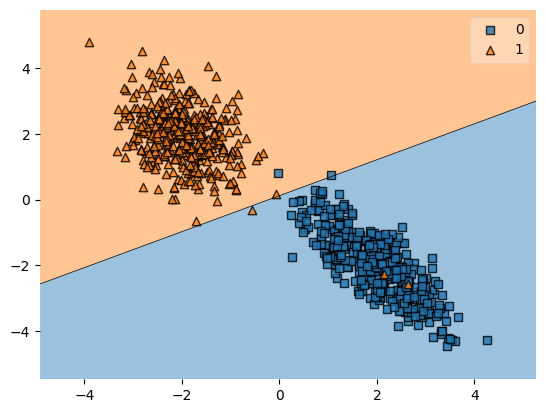

In [86]:
plot_decision_regions(x_train, y_train, clf=neuron)

## **🔸 MLP (from Scratch)**

### Activation Function

In [71]:
def linear(x):
    return x

In [72]:
def relu(x):
    return np.maximum(0, x)

In [73]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [74]:
def tanh(x):
    pass

### Loss 

In [75]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [76]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [77]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### MLP

In [78]:
class MLP:
    
    def __init__(self, hidden_layer_sizes, hidden_activation='relu', 
                 output_size=1, output_activation='sigmoid', 
                 n_iter=1000, loss_fn=bce, eta=0.1):
        
        self.hidden_layer_sizes = hidden_layer_sizes  # List of hidden layer sizes
        self.hidden_activation = hidden_activation  # Activation function for hidden layers
        self.output_size = output_size  # Output layer size
        self.output_activation = output_activation  # Activation function for output layer
        self.n_iter = n_iter  # Number of iterations for training
        self.loss_fn = loss_fn  # Loss function for training
        self.eta = eta  # Learning rate
        
    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i])  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)
    
    def fit(self, X, y):
        n, self.input_size = X.shape  # Number of samples and input size
        self._init_weights()
        for _ in range(self.n_iter):
            y_hat = self.predict(X)  # Make predictions
            loss = self.loss_fn(y, y_hat)  # Compute loss
            self._gradient_descent(X, y, y_hat)  # Update weights and biases
            print(loss)  # Print loss
        
    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (self._activation_derivative(self.hs[j-1], self.hidden_activation))

    def predict(self, X):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i>0 else X.copy()  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))  # Apply activation function
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)  # Output layer activation
        return y
    
    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)  # ReLU activation
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")
            
    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)  # Derivative of Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")


In [79]:
mlp = MLP([4, 3], output_size=1)#, output_activation=softmax)

In [80]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, 
                           n_classes=2, random_state=27)

mlp.fit(X, y[:, None])
# mlp.predict(X)

4.503322806726984
2.8274570440137805
1.9292656560619825
1.4752699926018835
1.246256572247625
1.119738134555169
1.036588153510011
0.9663549696491996
0.8915732855946085
0.8106061489048412
0.7295700091180816
0.6512088744586672
0.5770967045366157
0.5096110483055147
0.4508721701686511
0.40188382607182005
0.3622597133851373
0.3306799932327225
0.30555885322306264
0.2854775169537382
0.26922939295163767
0.2558864050141359
0.24480221836482047
0.23543520562272516
0.22736576976957143
0.22034112991611
0.2141415438030407
0.20862825694945436
0.20367129015827376
0.1991799837904173
0.195101982010462
0.19145202472102552
0.18810708034839044
0.1850585692506065
0.18224038558628558
0.17964619435307574
0.177225797817856
0.17496511704580286
0.17287190794671872
0.1709425656994169
0.16912786862708126
0.16742741085907129
0.16582898288581002
0.164304613024781
0.1628617724544555
0.16149572855896885
0.16019738896480443
0.15896697412862362
0.15779815799551983
0.15667332030202244
0.15560351337845443
0.154580841955519

<AxesSubplot: >

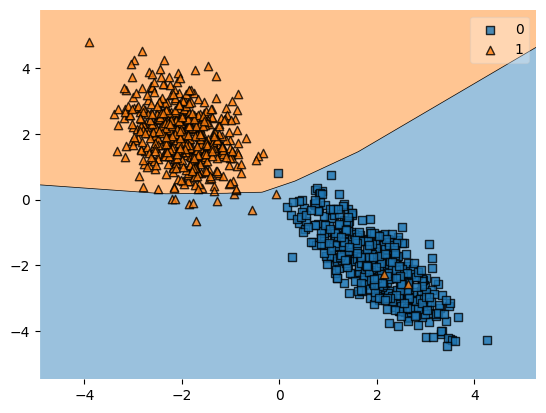

In [81]:
plot_decision_regions(X, y, mlp)

#### XOR

In [93]:
xor = MLP(hidden_layer_sizes=[2], hidden_activation=relu, output_size=1, output_activation=sigmoid)
xor.fit(X, y)
xor.predict(X)

array([[0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.79477863],
       [0.57046882],
       [0.65504773],
       [0.79477863]])

In [94]:
xor.ws, xor.bs

([array([[-1.36784882, -0.48372367],
         [-0.03718443,  0.16534386]]),
  array([[-0.84947972],
         [ 0.69516236]])],
 [array([-0.85563837, -0.3799835 ]), array([1.35397435])])

## **🔸 XOR (from Scratch)**

### Activation Function

In [102]:
def relu(x):
    return np.maximum(0, x)

In [103]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Loss 

In [104]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [105]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [106]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### Network

In [107]:
def mlp_xor(X, w1, b1, w2, b2):
    hidden_output = np.dot(X, w1) + b1
    activation_output = relu(hidden_output)
    output_layer = sigmoid(np.dot(activation_output, w2) + b2)
    return output_layer, hidden_output, activation_output

### Data

In [108]:
# Define the XOR problem inputs and outputs
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])

y = np.array([[0], 
              [1], 
              [1], 
              [0]])

### Initialization

In [109]:
# Define the initial weights and biases
np.random.seed(42)
w1 = np.random.rand(2, 2)  # Weights of the first layer
b1 = np.random.rand(1, 2)  # Biases of the first layer
w2 = np.random.rand(2, 1)  # Weights of the second layer
b2 = np.random.rand(1)     # Bias of the second layer

# Define the learning rate and number of iterations
learning_rate = 0.9
num_iterations = 10000

### Train

In [112]:
for i in range(num_iterations):
    # Forward propagation
    y_hat, h, a = mlp_xor(X, w1, b1, w2, b2)

    # Calculate the loss
    loss = bce(y, y_hat)
    print(loss)
    
    # Backward propagation
    # Calculate deltas
    delta_output = y_hat - y
    delta_hidden = (delta_output @ w2.T) * (h > 0)

    # Calculate gradients
    W2_grad = a.T @ delta_output
    b2_grad = delta_output.mean(0)
    W1_grad = X.T @ delta_hidden
    b1_grad = delta_hidden.mean(0)
    
    # Update weights and biases
    w2 -= learning_rate * W2_grad
    b2 -= learning_rate * b2_grad
    w1 -= learning_rate * W1_grad
    b1 -= learning_rate * b1_grad

0.9551102265228774
0.71226587918887
0.6953895524290212
0.6933625412304003
0.6914607098789183
0.6902212274204546
0.6861865073449301
0.6816942196514212
0.6800528889507402
0.6738764442425272
0.6678126215357629
0.6647414680891274
0.6521651741691505
0.6598071961684125
0.6951361060536744
0.6857867329238421
0.6480311220570182
0.6321010073145903
0.659974498595157
0.661041490416982
0.6280088202323145
0.6353582334238029
0.6207122915384063
0.651728107219733
0.5962681025547862
0.6378815585788356
0.5705642942195263
0.6279043090434726
0.5372808777336417
0.6047878749181135
0.4899498588442488
0.5588543271852452
0.4312395902068924
0.49452121945629135
0.3724913060107337
0.4392835197417435
0.3045329835409145
0.3868167842398017
0.2699417305672851
0.3283935878614355
0.2071635779974078
0.2619509814052266
0.16523055029202802
0.1511897576599189
0.14158893238745382
0.1363031139307945
0.1263588475098832
0.14772947349918691
0.1129302888272746
0.10483434919587718
0.09796642848153633
0.09196773874833185
0.08665089

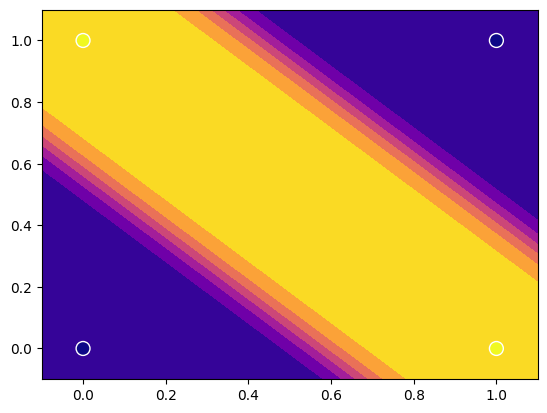

In [113]:
h = 0.001  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x1, x2 = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Y, H, A  = mlp_xor(np.c_[x1.ravel(), x2.ravel()], w1, b1, w2, b2)
Y = Y.reshape(x1.shape)

plt.contourf(x1, x2, Y, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='plasma', edgecolor='w')

In [114]:
A

array([[3.42082482, 0.        ],
       [3.41797375, 0.        ],
       [3.41512267, 0.        ],
       ...,
       [0.        , 3.93446603],
       [0.        , 3.93775059],
       [0.        , 3.94103515]])

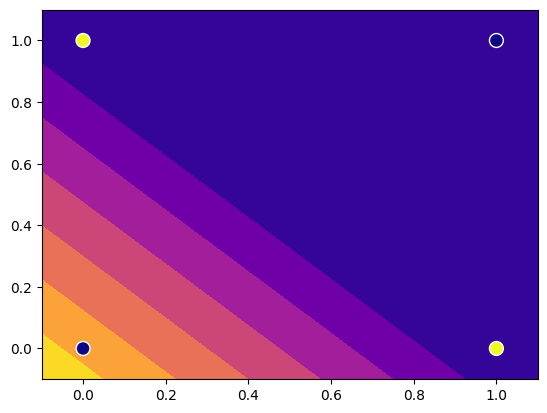

In [115]:
A0 = A[:, 0].reshape(x1.shape)

plt.contourf(x1, x2, A0, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='plasma', edgecolor='w')

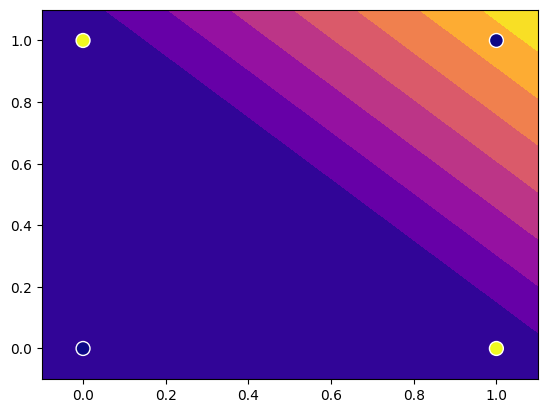

In [116]:
A1 = A[:, 1].reshape(x1.shape)

plt.contourf(x1, x2, A1, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='plasma', edgecolor='w')

## **🔸 MLP (sklearn)**

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.preprocessing import StandardScaler

### `MLPClassifier()`

In [177]:
X, y = load_breast_cancer(return_X_y=True)
print(X.shape, y.shape)

(569, 30) (569,)


In [178]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
model = MLPClassifier(hidden_layer_sizes=(90), max_iter=500, random_state=12)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9385964912280702

### `MLPRegressor()`

In [183]:
X, y = load_diabetes(return_X_y=True)
print(X.shape, y.shape)

(442, 10) (442,)


In [184]:
ys = StandardScaler().fit_transform(y[:, None])
ys

array([[-1.47194752e-02],
       [-1.00165882e+00],
       [-1.44579915e-01],
       [ 6.99512942e-01],
       [-2.22496178e-01],
       [-7.15965848e-01],
       [-1.83538046e-01],
       [-1.15749134e+00],
       [-5.47147277e-01],
       [ 2.05006151e+00],
       [-6.64021672e-01],
       [-1.07957508e+00],
       [ 3.48889755e-01],
       [ 4.26806019e-01],
       [-4.43258925e-01],
       [ 2.45001404e-01],
       [ 1.80071184e-01],
       [-1.05621783e-01],
       [-7.15965848e-01],
       [ 2.06043272e-01],
       [-1.09256112e+00],
       [-1.33929596e+00],
       [-1.09256112e+00],
       [ 1.20596866e+00],
       [ 4.13819975e-01],
       [ 6.47568766e-01],
       [-1.96524090e-01],
       [-8.71798376e-01],
       [-2.74440354e-01],
       [ 1.69943833e+00],
       [-3.00412442e-01],
       [-1.20943552e+00],
       [ 2.45262887e+00],
       [-8.45826288e-01],
       [-1.13151925e+00],
       [-6.51035629e-01],
       [ 1.46568953e+00],
       [ 1.60853602e+00],
       [ 1.2

In [185]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [199]:
model = MLPRegressor(hidden_layer_sizes=(30), max_iter=2000, learning_rate_init=0.1, random_state=12)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3952058738731823

### Attributes

In [200]:
[coef.shape for coef in model.coefs_]

[(10, 30), (30, 1)]

In [201]:
model.intercepts_

[array([-0.58007604, -0.19995794, -0.6344671 , -0.29707176,  2.77275212,
        -0.73235352,  1.54143508,  2.4170325 , -0.60172311, -0.58917172,
        -0.70906244,  2.7966099 , -0.26042905,  2.57194944, -0.26770629,
        -0.58019133, -0.59349956,  2.49898978,  2.42145558, -1.99529495,
        -0.27000443,  2.71318747,  2.64045077,  2.87962607,  2.94225001,
         2.90634012, -0.36656468,  1.19093722, -0.26003328, -0.12860452]),
 array([2.71744698])]

In [202]:
model.n_layers_

3

In [203]:
model.n_outputs_

1